In [1]:
import numpy as np

from speechbrain.lobes.beamform_multimic import DelaySum_Beamformer
import os
import glob
from pathlib import Path
import soundfile as sf
import torch
import torchaudio
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
# from speechbrain.processing.features import (
#     STFT,
#     ISTFT,
#     Complex_STFT,
# )
from pydub import AudioSegment
# from beamformer import 

/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: /opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in: /opt/anaconda3/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
 in /opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  warn(f"Failed to load image Python extension: {e}")


In [3]:
beamformer=DelaySum_Beamformer()
# stft = Complex_STFT(sample_rate=16000)
# istft = ISTFT(sample_rate=16000)

In [3]:
meeting_folder = "/Users/ccui/Desktop/POC/asteroid_results/AMIx/syAMI/2ch_2spk/ex_171"
wavs = os.listdir(meeting_folder)
# print(wavs)
array1_list = []
# array2_list = []
small_value = 1e-10
for wav in wavs:
    mic_type = wav.split(".")[0]
    print(mic_type)
    wav_path = os.path.join(meeting_folder, wav)
    if mic_type == "mixture1":
        # print(wav_path)
        # array_path_list.append(str(Path(wav)))
        array_np, fs = sf.read(
            wav_path,
            dtype="float32",
        )
        # array = torch.from_numpy(array_np).unsqueeze(0)

        # array1_list.append(array_np[..., np.newaxis])
    elif "s1_estimate" in mic_type:
        s1_estimate, fs = sf.read(
            wav_path,
            dtype="float32",
        )
    elif "s2_estimate" in mic_type:
        s2_estimate, fs = sf.read(
            wav_path,
            dtype="float32",
        )
    elif "s1" in mic_type:
        s1, fs = sf.read(
            wav_path,
            dtype="float32",
        )

    elif "s2" in mic_type:
        s2, fs = sf.read(
            wav_path,
            dtype="float32",
        )
s2[s2 == 0] = np.maximum(s2_estimate[s2 == 0], small_value)
s1[s1 == 0] = np.maximum(s1_estimate[s1 == 0], small_value)
# array1_list = torch.cat(array1_list, 0).float()
# array1_list = np.concatenate(array1_list, axis=1)
# array2_list = torch.cat(array2_list, 0).float()
# array1_list = array1_list[:, 16000 * 9 : 16000 * 15]
# array2_list = array2_list[:, 16000 * 9 : 16000 * 15]
# print(array1_list.shape)
# print(array2_list.shape)
s1 = (s1 / np.max(np.abs(s1))) * max(abs(s1_estimate))
s2 = (s2 / np.max(np.abs(s2))) * max(abs(s1_estimate))

metrics
s2
s1_estimate_norm
s1
s1_norm
s2_estimate
mixture2
mixture1
s1_estimate
mixture1_norm


In [5]:
meeting_folder = "/Users/ccui/Desktop/POC/asteroid_results/AMIx/real/audio_results_pretrained"
wavs = os.listdir(meeting_folder)
array1_list = []
# array2_list = []

for wav in wavs:
    mic_type = wav.split(".")[0]
    wav_path = os.path.join(meeting_folder, wav)
    if "itemES2006c_109_0_mix" in mic_type:
        # print(wav_path)
        # array_path_list.append(str(Path(wav)))
        real_array, fs = sf.read(
            wav_path,
            dtype="float32",
        )
        # array = torch.from_numpy(array_np).unsqueeze(0)

        # array1_list.append(array_np[..., np.newaxis])
    elif "itemES2006c_109_0_source1Est" in mic_type:
        real_s1, fs = sf.read(
            wav_path,
            dtype="float32",
        )
    elif "itemES2006c_109_0_source2Est" in mic_type:
        real_s2, fs = sf.read(
            wav_path,
            dtype="float32",
        )
    # elif "s1" in mic_type:
    #     s1, fs = sf.read(
    #         wav_path,
    #         dtype="float32",
    #     )
    # elif "s2" in mic_type:
    #     s2, fs = sf.read(
    #         wav_path,
    #         dtype="float32",
    #     )
# array1_list = torch.cat(array1_list, 0).float()
# array1_list = np.concatenate(array1_list, axis=1)
# array2_list = torch.cat(array2_list, 0).float()
# array1_list = array1_list[:, 16000 * 9 : 16000 * 15]
# array2_list = array2_list[:, 16000 * 9 : 16000 * 15]
# print(array1_list.shape)
# print(array2_list.shape)
real_array = (real_array / np.max(np.abs(real_array))) * max(abs(s1_estimate))
real_s1 = (real_s1 / np.max(np.abs(real_s1))) * max(abs(s1_estimate))
real_s2 = (real_s2 / np.max(np.abs(real_s2))) * max(abs(s1_estimate))

In [25]:
Audio(data=real_s1, rate=16000)

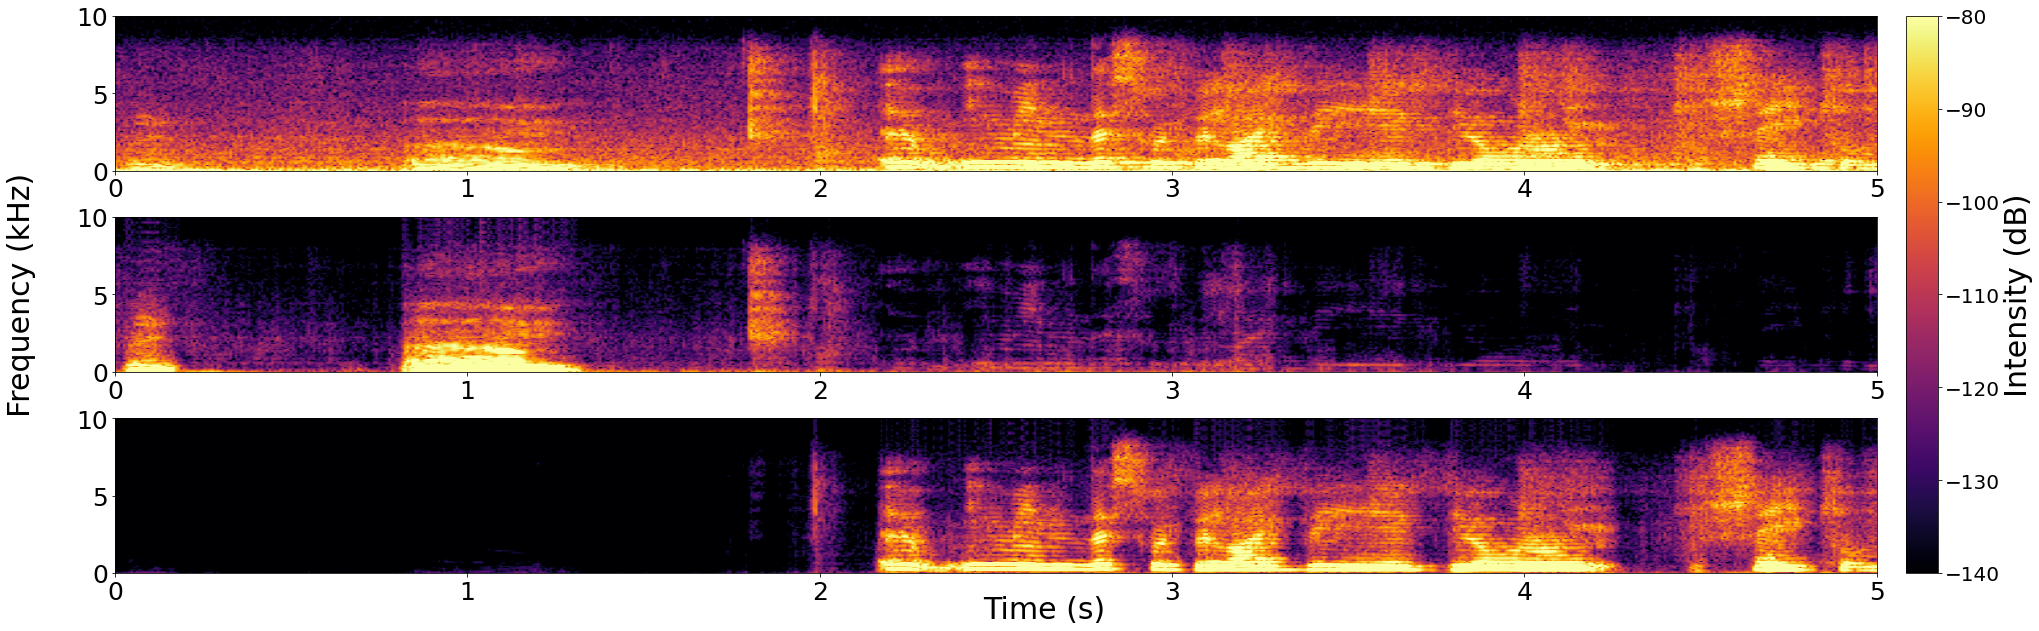

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec


def get_spect(signal, title, ax):
    # Compute the spectrogram
    Sxx, frequencies, _, _ = plt.specgram(signal, Fs=16000)
    mask = frequencies > 0
    Sxx_masked = Sxx[mask, :]
    sxx = 10 * np.log10(Sxx_masked)

    # Plot the spectrogram on the specified axis
    im = ax.imshow(sxx, aspect="auto", cmap="inferno", vmin=-140, vmax=-80, extent=[0, 5, 10, 0])
    ax.invert_yaxis()
    ax.set_title(title, fontsize=39)
    # ax.set_xlabel("Time (s)", fontsize=25)
    # ax.set_ylabel("Frequency (Hz)", fontsize=25)
    ax.tick_params(axis="both", labelsize=25)
    return im


# Create a 4-row plot with a shared colorbar
fig = plt.figure(figsize=(30, 9))
gs = gridspec.GridSpec(3, 2, width_ratios=[19.5, 0.5])  # Add an extra column for the colorbar

# Plot each spectrogram on a separate row
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[2, 0])

# ax1.axvline(x=1.45, linestyle="--", color="white", linewidth=5, label="Angle 377°")
# ax1.axvline(x=1.7, linestyle="--", color="white", linewidth=5, label="Angle 22°")
# ax1.axvline(x=2.8, linestyle="--", color="white", linewidth=5, label="Angle 377°")
# ax1.axvline(x=3.2, linestyle="--", color="white", linewidth=5, label="Angle 22°")

# ax2.axvline(x=1.45, linestyle="--", color="white", linewidth=5, label="Angle 377°")
# ax2.axvline(x=1.7, linestyle="--", color="white", linewidth=5, label="Angle 22°")
# ax2.axvline(x=2.8, linestyle="--", color="white", linewidth=5, label="Angle 377°")
# ax2.axvline(x=3.2, linestyle="--", color="white", linewidth=5, label="Angle 22°")

# ax3.axvline(x=1.45, linestyle="--", color="white", linewidth=5, label="Angle 377°")
# ax3.axvline(x=3.2, linestyle="--", color="white", linewidth=5, label="Angle 22°")

# ax3.axvline(x=2.8, linestyle="--", color="white", linewidth=5, label="Angle 377°")
# ax3.axvline(x=3.2, linestyle="--", color="white", linewidth=5, label="Angle 22°")

# ax4 = plt.subplot(gs[3, 0])

# im1 = get_spect(array1_list[0], "Channel 1 of the original signal", ax1)
# # im2 = get_spect(beamformed_array1, "Signal after DAS Beamforming", ax2)
# im3 = get_spect(neural, "Signal after Joint Trained Neural Beamforming", ax2)
# im4 = get_spect(source, "Ground truth (aligned Headset)", ax3)
idx = 0
im1 = get_spect(real_array, "", ax1)
# im2 = get_spect(beamformed_array1, "", ax2)
im3 = get_spect(real_s1, "", ax2)
im4 = get_spect(real_s2, "", ax3)

# Set a common xlabel and ylabel
fig.text(0.5, 0.001, "Time (s)", ha="center", fontsize=30)  # Common xlabel
fig.text(
    0.02, 0.5, "Frequency (kHz)", va="center", rotation="vertical", fontsize=30
)  # Common ylabel


# Adjust layout to prevent clipping of axis labels and move the subplots inward
plt.subplots_adjust(left=0.07, right=0.99, top=0.93, bottom=0.07, hspace=0.3)


# Add a common colorbar to the right of the plots
cax = plt.subplot(gs[:, 1])
cbar = plt.colorbar(im4, cax=cax, label="Intensity (dB)")

# Manually adjust the position of the colorbar
cax_pos = cax.get_position()
cax.set_position([cax_pos.x0 - 0.07, cax_pos.y0, cax_pos.width * 0.7, cax_pos.height])

cbar.ax.yaxis.label.set_fontsize(30)
# Increase font size for colorbar
cbar.ax.tick_params(labelsize=20)
# Show the plot
plt.savefig("save/ppt_sep_realami_2spk_large.png", bbox_inches="tight")
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/var/folders/l5/9kglh8tx5nb_wn200vv8zgwh00mc7h/T/ipykernel_87038/3288321248.py:11: RuntimeWarning: divide by zero encountered in log10
  sxx = 10 * np.log10(Sxx_masked)


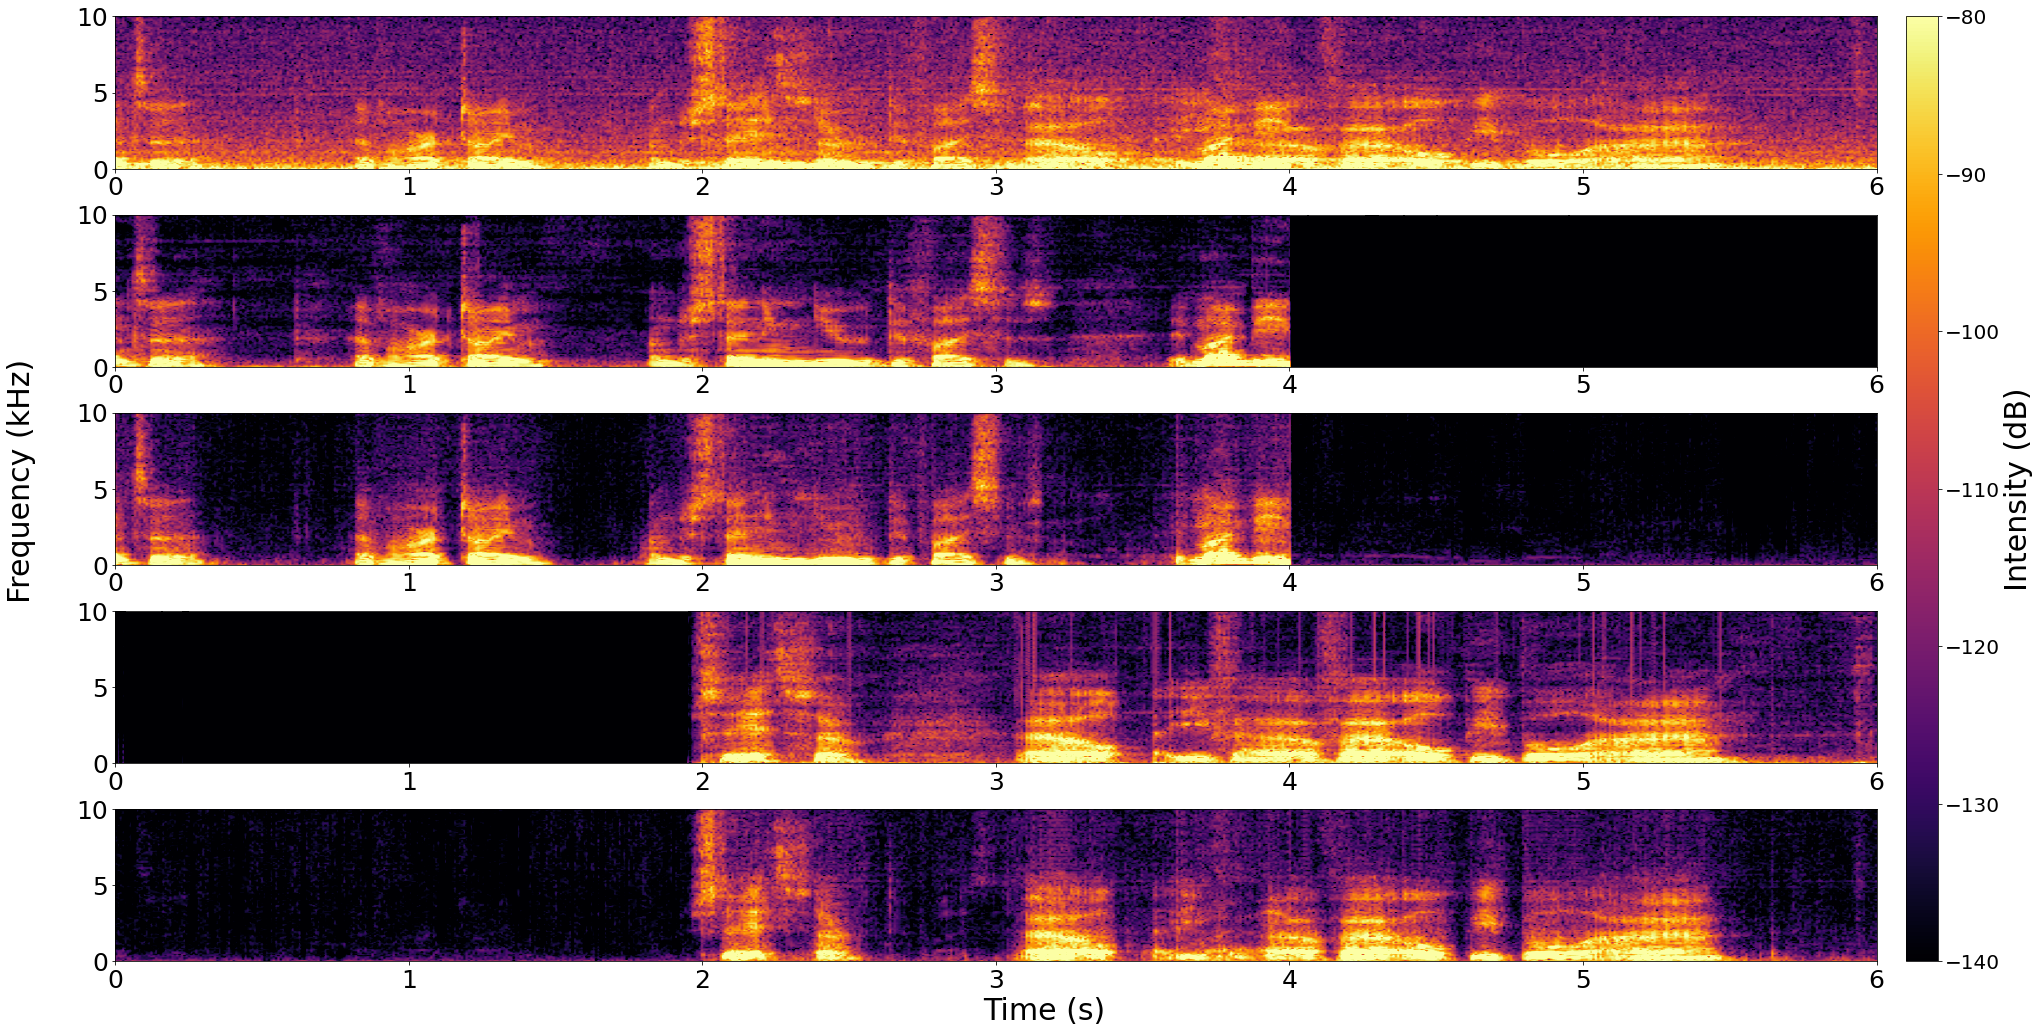

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec


def get_spect(signal, title, ax):
    # Compute the spectrogram
    Sxx, frequencies, _, _ = plt.specgram(signal, Fs=16000)
    mask = frequencies > 0
    Sxx_masked = Sxx[mask, :]
    sxx = 10 * np.log10(Sxx_masked)

    # Plot the spectrogram on the specified axis
    im = ax.imshow(sxx, aspect="auto", cmap="inferno", vmin=-140, vmax=-80, extent=[0, 6, 10, 0])
    ax.invert_yaxis()
    ax.set_title(title, fontsize=39)
    # ax.set_xlabel("Time (s)", fontsize=25)
    # ax.set_ylabel("Frequency (Hz)", fontsize=25)
    ax.tick_params(axis="both", labelsize=25)
    return im


# Create a 4-row plot with a shared colorbar
fig = plt.figure(figsize=(30, 15))
gs = gridspec.GridSpec(5, 2, width_ratios=[19.5, 0.5])  # Add an extra column for the colorbar

# Plot each spectrogram on a separate row
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[2, 0])
ax4 = plt.subplot(gs[3, 0])
ax5 = plt.subplot(gs[4, 0])

# ax1.axvline(x=1.45, linestyle="--", color="white", linewidth=5, label="Angle 377°")
# ax1.axvline(x=1.7, linestyle="--", color="white", linewidth=5, label="Angle 22°")
# ax1.axvline(x=2.8, linestyle="--", color="white", linewidth=5, label="Angle 377°")
# ax1.axvline(x=3.2, linestyle="--", color="white", linewidth=5, label="Angle 22°")

# ax2.axvline(x=1.45, linestyle="--", color="white", linewidth=5, label="Angle 377°")
# ax2.axvline(x=1.7, linestyle="--", color="white", linewidth=5, label="Angle 22°")
# ax2.axvline(x=2.8, linestyle="--", color="white", linewidth=5, label="Angle 377°")
# ax2.axvline(x=3.2, linestyle="--", color="white", linewidth=5, label="Angle 22°")

# ax3.axvline(x=1.45, linestyle="--", color="white", linewidth=5, label="Angle 377°")
# ax3.axvline(x=3.2, linestyle="--", color="white", linewidth=5, label="Angle 22°")

# ax3.axvline(x=2.8, linestyle="--", color="white", linewidth=5, label="Angle 377°")
# ax3.axvline(x=3.2, linestyle="--", color="white", linewidth=5, label="Angle 22°")

# ax4 = plt.subplot(gs[3, 0])

# im1 = get_spect(array1_list[0], "Channel 1 of the original signal", ax1)
# # im2 = get_spect(beamformed_array1, "Signal after DAS Beamforming", ax2)
# im3 = get_spect(neural, "Signal after Joint Trained Neural Beamforming", ax2)
# im4 = get_spect(source, "Ground truth (aligned Headset)", ax3)
idx = 0
im1 = get_spect(array_np, "", ax1)
im2 = get_spect(s1, "", ax2)
im3 = get_spect(s1_estimate, "", ax3)
im4 = get_spect(s2, "", ax4)
im5 = get_spect(s2_estimate, "", ax5)

# Set a common xlabel and ylabel
fig.text(0.5, 0.001, "Time (s)", ha="center", fontsize=30)  # Common xlabel
fig.text(
    0.02, 0.5, "Frequency (kHz)", va="center", rotation="vertical", fontsize=30
)  # Common ylabel


# Adjust layout to prevent clipping of axis labels and move the subplots inward
plt.subplots_adjust(left=0.07, right=0.99, top=0.93, bottom=0.055, hspace=0.3)


# Add a common colorbar to the right of the plots
cax = plt.subplot(gs[:, 1])
cbar = plt.colorbar(im4, cax=cax, label="Intensity (dB)")

# Manually adjust the position of the colorbar
cax_pos = cax.get_position()
cax.set_position([cax_pos.x0 - 0.07, cax_pos.y0, cax_pos.width * 0.7, cax_pos.height])

cbar.ax.yaxis.label.set_fontsize(30)
# Increase font size for colorbar
cbar.ax.tick_params(labelsize=20)
# Show the plot
plt.savefig("save/ppt_sep_Mixami_2spk_large.png", bbox_inches="tight")
plt.show()